Topic: Challenge Set 6 
Subject: Linear Learning
Date: 01/30/2018 
Name: Matias Beeck

## Challenge 1

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

np.random.seed(35)

b0, b1 = 3., 3.

x = np.abs(np.random.normal(loc=2, scale=10, size=1000))
y = b0 + b1 * np.log(x) + 0.5 * np.random.randn(x.size)

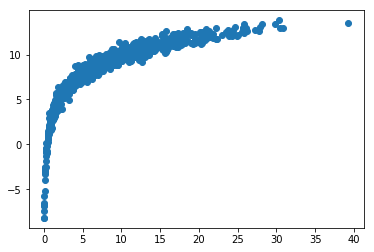

In [2]:
# Log Function
plt.scatter(x,y)

### Quadratic 

In [3]:
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import OLS

quadratic_x = add_constant(np.stack((x, x**2), axis=1))

model = OLS(y, quadratic_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     2234.
Date:                Mon, 29 Jan 2018   Prob (F-statistic):               0.00
Time:                        17:42:17   Log-Likelihood:                -1770.0
No. Observations:                1000   AIC:                             3546.
Df Residuals:                     997   BIC:                             3561.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6354      0.100     26.350      0.000       2.439       2.832
x1             0.9676      0.020     47.928      0.000       0.928       1.007
x2            -0.0234      0.001    -28.147      0.000      -0.025      -0.022
==============================================================================
Omnibus:                      692.130   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16112.335
Skew:                          -2.839   Prob(JB):                         0.00
Kurtosis:                      21.827   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Logarithmic

In [4]:
logged_x = add_constant(np.log(x))

model = OLS(y, logged_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 4.369e+04
Date:                Mon, 29 Jan 2018   Prob (F-statistic):               0.00
Time:                        17:42:17   Log-Likelihood:                -719.93
No. Observations:                1000   AIC:                             1444.
Df Residuals:                     998   BIC:                             1454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0443      0.029    105.193      0.000       2.988       3.101
x1             2.9797      0.014    209.019      0.000       2.952       3.008
==============================================================================
Omnibus:                        3.590   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                3.545
Skew:                           0.146   Prob(JB):                        0.170
Kurtosis:                       3.011   Cond. No.                         4.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

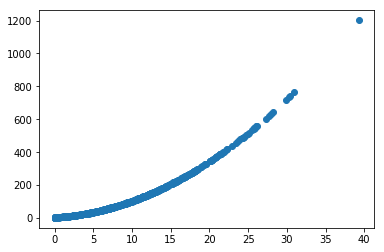

In [5]:
b2 = 0.7
y2 = b0 + b1 * x + b2 * x**2 + np.random.randn(x.size)
plt.scatter(x,y2)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y2)
model = OLS(X_train, y_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     6737.
Date:                Mon, 29 Jan 2018   Prob (F-statistic):               0.00
Time:                        17:42:18   Log-Likelihood:                -1949.1
No. Observations:                 750   AIC:                             3900.
Df Residuals:                     749   BIC:                             3905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0612      0.001     82.082      0.000       0.060       0.063
==============================================================================
Omnibus:                      919.038   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123780.923
Skew:                          -6.037   Prob(JB):                         0.00
Kurtosis:                      64.767   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, model.predict(X_test))
print(train_mse)
print(test_mse)

25272.9504081
27096.5463881


### Challenge 3

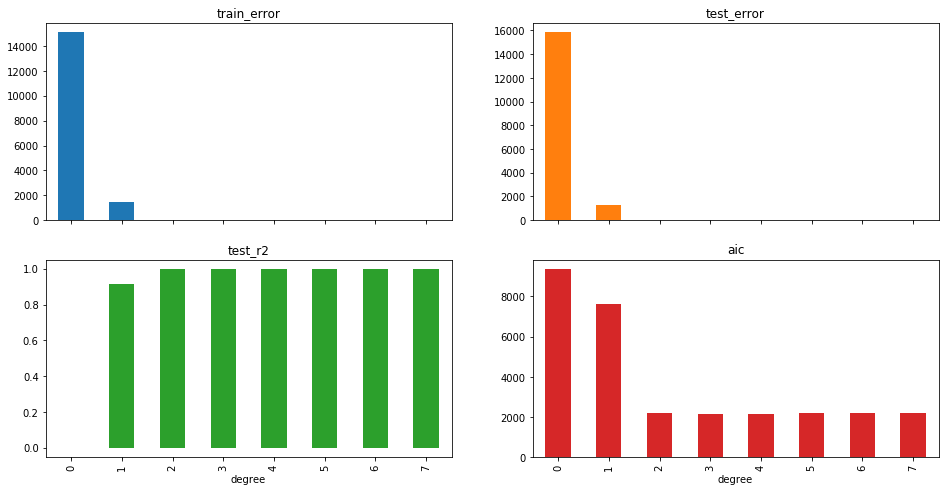

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

degrees = []
train_mses = []
test_mses = []
test_r2s = []
aics = []

for deg in range(0,8):
    poly = PolynomialFeatures(deg)
    if x.ndim == 1:
        x = x[:, None]
    xpoly = poly.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(xpoly, y2)

    model = OLS(y_train, X_train).fit()
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))
    
    aics.append(model.aic)
    test_r2s.append(r2_score(y_test, model.predict(X_test)))
    test_mses.append(test_mse)
    train_mses.append(train_mse)
    degrees.append(deg)

    
    
degree_fit_results = pd.DataFrame(list(zip(degrees, train_mses, test_mses, test_r2s, aics)), columns=['degree','train_error','test_error','test_r2','aic']).set_index('degree')
degree_fit_results.plot.bar(subplots=True, layout=(2,2), figsize=(16,8),legend=False);
